# Статистический анализ данных / Python
## Задание 1

**Правила:**

* Дедлайн **17 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 1"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline


### Задача 1. (5 баллов)

Пусть $X_1, ..., X_n$ --- выборка из равномерного распределения на отрезе $[0, \theta]$. На занятии было получено, что оценка $X_{(n)}$ является оценкой максимального правдоподобия параметра $\theta$. Покажите, что она является состоятельной оценкой $\theta$:

$$\mathsf{P}_{\theta}(X_{(n)} < \theta - \varepsilon) = \mathsf{P}_{\theta}(X_1 < \theta - \varepsilon) * \mathsf{P}_{\theta}(X_2 < \theta - \varepsilon) * ... * \mathsf{P}_{\theta}(X_n < \theta - \varepsilon) = $$ $$(\mathsf{P}_{\theta}(X_1 < \theta - \varepsilon))^n = (F_{X_1}(\theta - \varepsilon))^n = \left ( \frac{\theta - \varepsilon}{\theta} \right )^n \rightarrow 0, \  \forall \varepsilon > 0,\  n \rightarrow \infty $$

*Указание.* Вспомните определение $X_{(n)}$ и воспользуйтесь независимостью.

В чем практический смысл состоятельности?

**Ответ:** По состоятельным оценкам можно делать точные выводы при достаточном объеме выборки.

Оценка $X_{(n)}$ не является асимптотически нормальной, но в данном случае можно доказать свойство круче:
$$n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right).$$  
Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из равномерного распределения на отрезке $[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [2]:
samples_count = 300
size = 500

samples = sps.uniform(loc=0, scale = 1).rvs(size=(samples_count, size))
theta = np.maximum.accumulate(samples, axis=1)
T = np.array([np.arange(1, size+1)] * samples_count) * (1 - theta)
# T = size * (1 - theta)

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.1`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

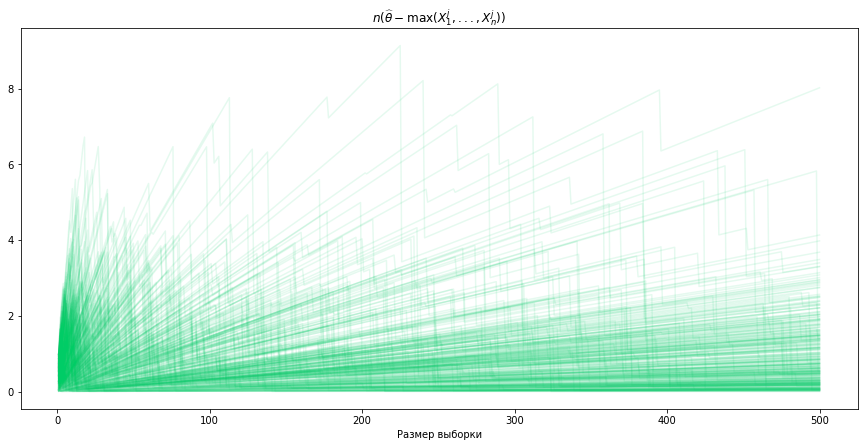

In [3]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, T[i], 
             color=green, alpha=0.1)
plt.title('$n(\\widehat{\\theta} - \max(X_1^j, ..., X_n^j))$')
plt.xlabel('Размер выборки')
plt.show()

**Ответ:** Нет

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

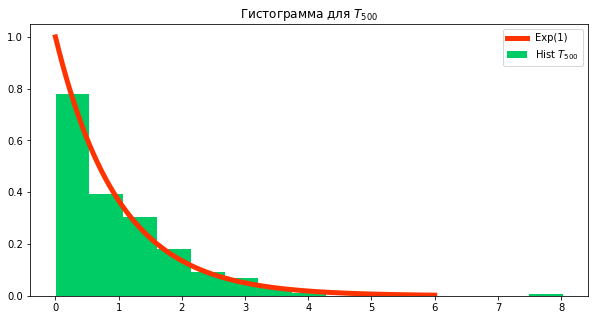

In [4]:
grid = np.linspace(0, 6, 1000)

plt.figure(figsize=(10, 5))
plt.hist(T[:, -1], bins=15, density=True, color=green)
plt.plot(grid, sps.expon(scale=1).pdf(grid), lw=5, color=red)
plt.title('Гистограмма для $T_{500}$')
plt.legend( ("Exp(1)", "Hist $T_{500}$") )
plt.show()

Сделайте вывод по задаче и ответьте на вопросы:
* Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? 
* Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$?
* Чем это свойство круче асимптотической нормальности и как это может быть полезно на практике?

**Вывод:** 
1. Да, гистограмма достаточно хорошо приближает плотность распределения $Exp(1)$
2. Строго говоря, мы проверили только для $\theta = 1$, и мы можем сказать, что при $\theta = 1$ выполняется $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$
3. Кажется, что это свойство можно назвать "ассимпотической экспоненциальностью". Возможно, это свойство круче асимпотической нормальности, потому что домножение на $n$, а не на $\sqrt{n}$.

### Задача 2. (5 баллов)
В этом задании нужно сделать оценку ОМП для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.


Скачайте данные по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/wine и загрузите их с помощью библиотеки pandas

In [5]:
data = pd.read_csv('wine.data', header=None)
data.columns = ['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Пусть выборка $(X_1, \dots, X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со вектором средних $\mu \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.
Можно показать, то оценками максимального правдоподобия являются
$$\widehat{\mu} = \overline{X},\ \ \ \widehat{\Sigma}=\frac{1}{n}\sum_{i=1}^n \left(X_i - \widehat{\mu}\right)\left(X_i - \widehat{\mu}\right)^T$$

Рассмотрим колонки "Alcalinity of ash", "Proanthocyanins", "Hue". Предположим, что
данные в них образуют выборку из многомерного нормального распределения с неизвестными
параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что
данные визуально похожи на нормальное распределение:

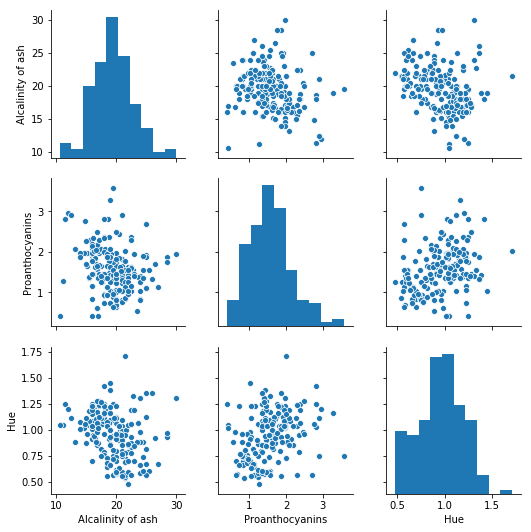

In [9]:
sns.pairplot(data[["Alcalinity of ash", "Proanthocyanins", "Hue"]])

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [185]:
sps.shapiro([1,2,3,4,5] * 100)

(0.8877304196357727, 1.2804311272741621e-18)

In [190]:
features = ["Alcalinity of ash", "Proanthocyanins", "Hue"]

p_vals = []

for feat in features:
    _, p_val = sps.shapiro(data[feat])
    p_vals.append(p_val)
    
for i, el in enumerate(multipletests(p_vals)[1]):
    print(features[i], ' : ', el)

Alcalinity of ash  :  0.26386943459510803
Proanthocyanins  :  0.042736454380242206
Hue  :  0.042736454380242206


Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [19]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    
    sample = pd.DataFrame(sample)
    
    return sample.mean().values

In [124]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    
    X = sample.values
    
    return 1 / (len(sample) - 1) * \
            np.sum([np.dot((el - mle_for_mean(X)).reshape(-1,1), 
                           (el - mle_for_mean(X)).reshape(1,-1)) for el in X], axis=0)

In [191]:
mu = mle_for_mean(data[["Alcalinity of ash", "Proanthocyanins", "Hue"]])
sigma = mle_for_covariance_matrix(data[["Alcalinity of ash", "Proanthocyanins", "Hue"]])

Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

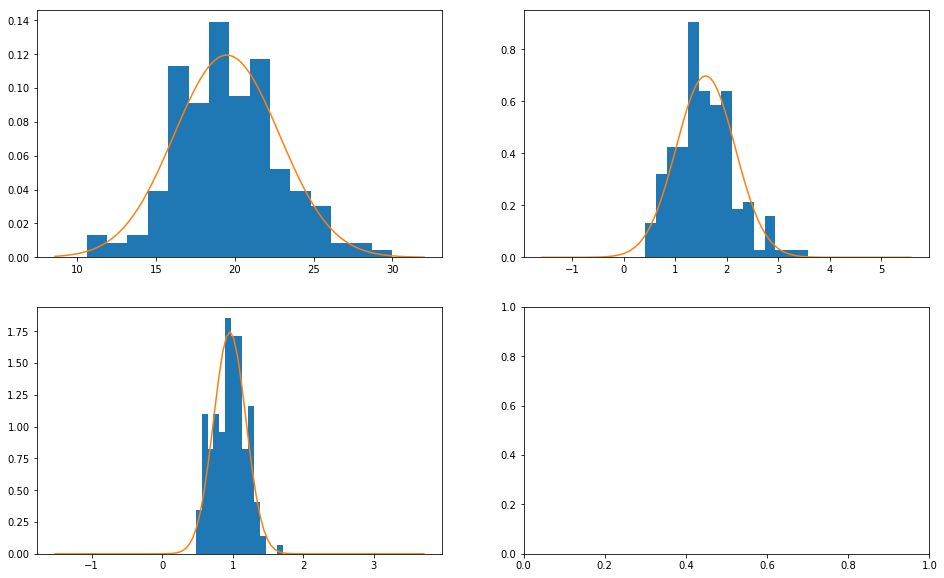

In [192]:
features = ["Alcalinity of ash", "Proanthocyanins", "Hue"]
fig, axs = plt.subplots(2, 2, figsize=(16,10))

for idx in range(3):
    feat = features[idx]

    distr = sps.norm(
                 mle_for_mean(data[[feat]])[0],
                 np.sqrt(mle_for_covariance_matrix(data[[feat]])[0])
             )
    
    axs[idx // 2,idx % 2].hist(data[feat], bins=15, density=True)
    axs[idx // 2,idx % 2].plot(np.linspace(data[feat].min()-2,data[feat].max()+2, 100), 
                               distr.pdf(np.linspace(data[feat].min()-2,data[feat].max()+2, 100)))

plt.show()

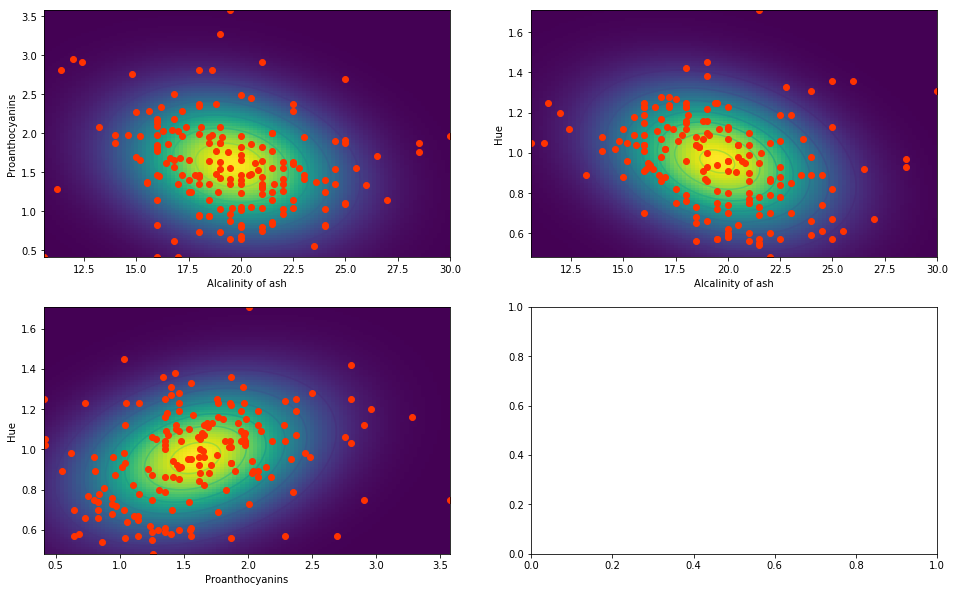

In [193]:
features = ["Alcalinity of ash", "Proanthocyanins", "Hue"]

my_range = [[0, 0, features[0], features[1]], [0, 1, features[0], features[2]],
            [1, 0, features[1], features[2]]]
fig, axs = plt.subplots(2, 2, figsize=(16,10))

for i1, i2, f1, f2 in my_range:

    x = np.linspace(min(data[f1]), max(data[f1]), 100)
    y = np.linspace(min(data[f2]), max(data[f2]), 100)
    X,Y = np.meshgrid(x,y)

    pos = np.array([X.flatten(),Y.flatten()]).T



    rv = sps.multivariate_normal(mle_for_mean(data[[f1, f2]]),
                                 mle_for_covariance_matrix(data[[f1, f2]]))

    axs[i1, i2].contour(X,Y,rv.pdf(pos).reshape(100,100))
    axs[i1, i2].pcolormesh(X,Y,rv.pdf(pos).reshape(100,100))
    axs[i1, i2].plot(data[f1], data[f2], 'bo', c=red)
    axs[i1, i2].set(xlabel=f1, ylabel=f2)


plt.show()

Сделайте вывод по задаче и предложите способ уточнения модели, возможно, добавив другие признаки.

**Выводы:** Распределения этих трех признаков достаточно неплохо описываются нормальным распределением.